In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns = None
pd.options.display.max_rows = None

doh_dailyreport = pd.read_csv('DOH_Data_Drop\DOH COVID Data Drop_ 20220219 - 05 DOH Data Collect - Daily Report.csv')
doh_baseline = pd.read_csv('DOH_Data_Drop\DOH COVID Data Drop_ 20220219 - 10 DOH Data Collect - Baseline.csv')
metadata = pd.read_csv('DOH_Data_Drop\DOH COVID Data Drop_ 20220219 - 03 Metadata - Fields.csv')

# Test-3 Data of Spread of Disease
sod_G3 = pd.read_csv('Test-3\Test 3 - Galvez\Test 3 Galvez - Spread of Disease.csv', skiprows = 18, usecols=[0,1,5,9])

# Test-4 Data of Spread of Disease
sod_G4 = pd.read_csv('Test-4\Test 4 - Galvez\Test 4 Galvez - Spread of Disease.csv', skiprows = 18, usecols=[0,1,5,9])

#Renaming SoD to respective column names
sod_G3.columns = ['days', 'asym', 'mild', 'severe']
sod_G4.columns = ['days', 'asym', 'mild', 'severe']


In [20]:
sodGdays3 = sod_G3.groupby(sod_G3.index // 480).sum()
sodGdays4 = sod_G4.groupby(sod_G4.index // 480).sum()

In [21]:
# Convert reportdate 'string' from dailyreport to 'datetime' datatype
doh_dailyreport['reportdate'] = pd.to_datetime(doh_dailyreport['reportdate'])

# Filtering out to only the NCR Region
ncr = doh_dailyreport[doh_dailyreport['region'] == 'NATIONAL CAPITAL REGION (NCR)']

district_1 = "NCR, CITY OF MANILA, FIRST DISTRICT (NOT A PROVINCE)"

# Filtering out to only Manila City
manila = doh_dailyreport[doh_dailyreport['province'] == district_1]

manila.head()

,hfhudcode,id,cfname,updateddate,addeddate,reportdate,icu_v,icu_o,isolbed_v,isolbed_o,beds_ward_v,beds_ward_o,mechvent_v,mechvent_o,icu_v_nc,icu_o_nc,nonicu_v_nc,nonicu_o_nc,mechvent_v_nc,mechvent_o_nc,qnurse,qdoctor,qother,nurse_adm,doctor_adm,other_adm,susp_asym,susp_mild,susp_severe,susp_crit,susp_died,susp_mod,prob_asym,prob_mild,prob_severe,prob_crit,prob_died,prob_mod,conf_asym,conf_mild,conf_severe,conf_crit,conf_died,conf_mod,tpatient_adm,tpatient_er,tpatient_icu,trans_ttmf,discharged,region,region_psgc,province_psgc,city_mun_psgc,province,city_mun,north_coord,east_coord
69602,DOH000000000000650,914.0,"MARY CHILES GENERAL HOSPITAL, INC.",2020-07-02 22:29:57,2020-07-02 22:29:57,2020-07-02,0.0,0.0,0.0,0.0,0.0,11.0,0.0,1.0,0.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,NaN,0.0,9.0,0.0,0.0,0.0,NaN,7.0,3.0,0.0,1.0,0.0,NaN,47.0,45.0,0.0,0.0,0.0,NATIONAL CAPITAL REGION (NCR),PH130000000,PH133900000,PH133906000,"NCR, CITY OF MANILA, FIRST DISTRICT (NOT A PRO...",SAMPALOC,0.0,0.0
69603,DOH000000000000650,933.0,"MARY CHILES GENERAL HOSPITAL, INC.",2020-07-03 04:57:06,2020-07-03 04:57:06,2020-07-03,0.0,0.0,0.0,0.0,0.0,11.0,0.0,1.0,0.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,NaN,0.0,13.0,0.0,0.0,0.0,NaN,7.0,3.0,0.0,1.0,0.0,NaN,48.0,65.0,0.0,0.0,0.0,NATIONAL CAPITAL REGION (NCR),PH130000000,PH133900000,PH133906000,"NCR, CITY OF MANILA, FIRST DISTRICT (NOT A PRO...",SAMPALOC,0.0,0.0
69604,DOH000000000000650,3829.0,"MARY CHILES GENERAL HOSPITAL, INC.",2020-07-04 14:54:34,2020-07-04 14:54:34,2020-07-04,0.0,0.0,0.0,0.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,NaN,0.0,14.0,0.0,0.0,0.0,NaN,7.0,3.0,0.0,0.0,0.0,NaN,45.0,30.0,0.0,0.0,0.0,NATIONAL CAPITAL REGION (NCR),PH130000000,PH133900000,PH133906000,"NCR, CITY OF MANILA, FIRST DISTRICT (NOT A PRO...",SAMPALOC,0.0,0.0
69605,DOH000000000000650,4733.0,"MARY CHILES GENERAL HOSPITAL, INC.",2020-07-05 09:13:14,2020-07-05 09:13:14,2020-07-05,0.0,0.0,0.0,0.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,NaN,0.0,15.0,0.0,0.0,0.0,NaN,7.0,3.0,0.0,0.0,0.0,NaN,54.0,30.0,0.0,0.0,0.0,NATIONAL CAPITAL REGION (NCR),PH130000000,PH133900000,PH133906000,"NCR, CITY OF MANILA, FIRST DISTRICT (NOT A PRO...",SAMPALOC,0.0,0.0
69606,DOH000000000000650,7230.0,"MARY CHILES GENERAL HOSPITAL, INC.",2020-07-06 16:11:33,2020-07-06 16:11:33,2020-07-06,0.0,0.0,0.0,0.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,NaN,0.0,21.0,0.0,0.0,0.0,NaN,7.0,3.0,0.0,0.0,0.0,NaN,52.0,37.0,0.0,0.0,0.0,NATIONAL CAPITAL REGION (NCR),PH130000000,PH133900000,PH133906000,"NCR, CITY OF MANILA, FIRST DISTRICT (NOT A PRO...",SAMPALOC,0.0,0.0


# Metadata
### What do the headers mean?

Refer to Index [47-69] for the cases 

In [22]:
metadata

,Sheet,Field,Description,Type,Question Format,Possible Responses,Purpose
0,DOH COVID Data Drop - 04 Case Information,CaseCode,Random code assigned for labelling cases; does...,Text,*,NaN,NaN
1,DOH COVID Data Drop - 04 Case Information,Age,Age,Number,Age,NaN,NaN
2,DOH COVID Data Drop - 04 Case Information,AgeGroup,Five-year age group,Text,*,NaN,NaN
3,DOH COVID Data Drop - 04 Case Information,Sex,Sex,Text,Sex,NaN,NaN
4,DOH COVID Data Drop - 04 Case Information,DateSpecimen,Date when specimen was collected,Date,NaN,NaN,NaN
5,DOH COVID Data Drop - 04 Case Information,DateResultRelease,Date of release of result,Date,NaN,NaN,NaN
6,DOH COVID Data Drop - 04 Case Information,DateRepConf,Date publicly announced as confirmed case,Date,NaN,NaN,NaN
7,DOH COVID Data Drop - 04 Case Information,DateDied,Date died,Date,NaN,NaN,NaN
8,DOH COVID Data Drop - 04 Case Information,DateRecover,Date recovered,Date,NaN,NaN,NaN
9,DOH COVID Data Drop - 04 Case Information,RemovalType,Type of removal (recovery or death),Text,NaN,NaN,NaN


# Select Pandas dataframe rows between two dates

[Guide](https://www.interviewqs.com/ddi-code-snippets/select-pandas-dataframe-rows-between-two-dates)

In [23]:
start_date = '2021-08-01'
end_date = '2021-12-15'

In [24]:
mask = (ncr['reportdate'] > start_date) & (ncr['reportdate'] <= end_date)
manila_mask = (manila['reportdate'] > start_date) & (manila['reportdate'] <= end_date)

In [25]:
ncr_update = ncr.loc[mask]

manila_update = manila.loc[mask]
manila_update.tail()

,hfhudcode,id,cfname,updateddate,addeddate,reportdate,icu_v,icu_o,isolbed_v,isolbed_o,beds_ward_v,beds_ward_o,mechvent_v,mechvent_o,icu_v_nc,icu_o_nc,nonicu_v_nc,nonicu_o_nc,mechvent_v_nc,mechvent_o_nc,qnurse,qdoctor,qother,nurse_adm,doctor_adm,other_adm,susp_asym,susp_mild,susp_severe,susp_crit,susp_died,susp_mod,prob_asym,prob_mild,prob_severe,prob_crit,prob_died,prob_mod,conf_asym,conf_mild,conf_severe,conf_crit,conf_died,conf_mod,tpatient_adm,tpatient_er,tpatient_icu,trans_ttmf,discharged,region,region_psgc,province_psgc,city_mun_psgc,province,city_mun,north_coord,east_coord
724473,DOH000000000000655,622927.0,"MEDICAL CENTER MANILA, INC.",2021-12-11 17:01:14,2021-12-11 17:01:14,2021-12-11,4.0,1.0,46.0,10.0,0.0,0.0,5.0,0.0,1.0,4.0,47.0,54.0,9.0,4.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,73.0,26.0,2.0,0.0,229.0,NATIONAL CAPITAL REGION (NCR),PH130000000,PH133900000,PH133908000,"NCR, CITY OF MANILA, FIRST DISTRICT (NOT A PRO...",ERMITA,0.0,0.0
724474,DOH000000000000655,624388.0,"MEDICAL CENTER MANILA, INC.",2021-12-12 15:54:59,2021-12-12 15:54:59,2021-12-12,4.0,1.0,45.0,11.0,0.0,0.0,5.0,0.0,5.0,0.0,61.0,40.0,13.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,73.0,26.0,2.0,0.0,229.0,NATIONAL CAPITAL REGION (NCR),PH130000000,PH133900000,PH133908000,"NCR, CITY OF MANILA, FIRST DISTRICT (NOT A PRO...",ERMITA,0.0,0.0
724475,DOH000000000000655,625079.0,"MEDICAL CENTER MANILA, INC.",2021-12-13 08:29:24,2021-12-13 08:29:24,2021-12-13,4.0,1.0,45.0,11.0,0.0,0.0,4.0,1.0,4.0,1.0,58.0,43.0,12.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,73.0,26.0,2.0,0.0,229.0,NATIONAL CAPITAL REGION (NCR),PH130000000,PH133900000,PH133908000,"NCR, CITY OF MANILA, FIRST DISTRICT (NOT A PRO...",ERMITA,0.0,0.0
724476,DOH000000000000655,626624.0,"MEDICAL CENTER MANILA, INC.",2021-12-14 08:25:48,2021-12-14 08:25:48,2021-12-14,4.0,1.0,43.0,13.0,0.0,0.0,4.0,1.0,5.0,0.0,50.0,51.0,13.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,73.0,26.0,2.0,0.0,229.0,NATIONAL CAPITAL REGION (NCR),PH130000000,PH133900000,PH133908000,"NCR, CITY OF MANILA, FIRST DISTRICT (NOT A PRO...",ERMITA,0.0,0.0
724477,DOH000000000000655,628416.0,"MEDICAL CENTER MANILA, INC.",2021-12-15 09:02:31,2021-12-15 09:02:31,2021-12-15,4.0,1.0,42.0,14.0,0.0,0.0,4.0,1.0,5.0,0.0,46.0,55.0,12.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,73.0,26.0,2.0,0.0,229.0,NATIONAL CAPITAL REGION (NCR),PH130000000,PH133900000,PH133908000,"NCR, CITY OF MANILA, FIRST DISTRICT (NOT A PRO...",ERMITA,0.0,0.0


# Group cases in dates

### NCR

In [26]:
#ncr_date = ncr.groupby([ncr['reportdate'].dt.date]).sum()
ncr_date = ncr_update.groupby([ncr['reportdate'].dt.date]).sum()
ncr_date.head()

,id,icu_v,icu_o,isolbed_v,isolbed_o,beds_ward_v,beds_ward_o,mechvent_v,mechvent_o,icu_v_nc,icu_o_nc,nonicu_v_nc,nonicu_o_nc,mechvent_v_nc,mechvent_o_nc,qnurse,qdoctor,qother,nurse_adm,doctor_adm,other_adm,susp_asym,susp_mild,susp_severe,susp_crit,susp_died,susp_mod,prob_asym,prob_mild,prob_severe,prob_crit,prob_died,prob_mod,conf_asym,conf_mild,conf_severe,conf_crit,conf_died,conf_mod,tpatient_adm,tpatient_er,tpatient_icu,trans_ttmf,discharged,north_coord,east_coord
reportdate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-08-02,63997878.0,495.0,660.0,2206.0,2310.0,1966.0,1683.0,571.0,402.0,766.0,846.0,5286.0,10175.0,689.0,562.0,371.0,139.0,273.0,36.0,11.0,36.0,448.0,441.0,250.0,65.0,29.0,609.0,66.0,117.0,114.0,49.0,21.0,311.0,229.0,696.0,634.0,340.0,4.0,967.0,14268.0,5214.0,978.0,22.0,443.0,0.0,0.0
2021-08-03,64271856.0,474.0,677.0,2184.0,2390.0,1886.0,1712.0,578.0,422.0,723.0,825.0,4880.0,10730.0,635.0,572.0,371.0,139.0,273.0,36.0,11.0,36.0,416.0,445.0,279.0,61.0,29.0,544.0,66.0,153.0,115.0,57.0,21.0,277.0,225.0,712.0,665.0,364.0,4.0,1030.0,14268.0,5214.0,978.0,22.0,443.0,0.0,0.0
2021-08-04,64536176.0,479.0,661.0,2198.0,2418.0,1803.0,1816.0,587.0,415.0,692.0,836.0,4948.0,10679.0,618.0,535.0,371.0,139.0,273.0,36.0,11.0,36.0,404.0,460.0,282.0,62.0,29.0,550.0,98.0,135.0,116.0,44.0,21.0,287.0,289.0,722.0,742.0,363.0,4.0,1124.0,14268.0,5214.0,978.0,22.0,443.0,0.0,0.0
2021-08-05,64807802.0,456.0,701.0,2115.0,2418.0,1710.0,1934.0,554.0,455.0,722.0,869.0,5118.0,10527.0,656.0,509.0,371.0,139.0,273.0,36.0,11.0,36.0,373.0,428.0,263.0,73.0,29.0,660.0,86.0,106.0,109.0,53.0,21.0,275.0,309.0,777.0,735.0,376.0,4.0,1213.0,14268.0,5214.0,978.0,22.0,443.0,0.0,0.0
2021-08-06,65081180.0,471.0,679.0,2129.0,2489.0,1734.0,1949.0,545.0,456.0,668.0,846.0,5143.0,10407.0,642.0,511.0,371.0,139.0,273.0,36.0,11.0,36.0,386.0,495.0,251.0,85.0,29.0,505.0,75.0,120.0,110.0,45.0,21.0,271.0,328.0,842.0,795.0,379.0,4.0,1282.0,14268.0,5214.0,978.0,22.0,443.0,0.0,0.0


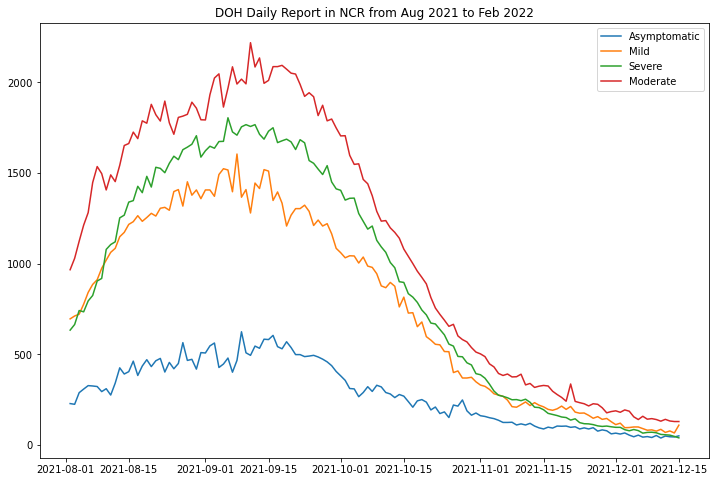

In [27]:
plt.figure(figsize=(12,8))
plt.plot(ncr_date.conf_asym)
plt.plot(ncr_date.conf_mild)
plt.plot(ncr_date.conf_severe)
plt.plot(ncr_date.conf_mod)
plt.legend(['Asymptomatic', 'Mild', 'Severe', 'Moderate'])
plt.title('DOH Daily Report in NCR from Aug 2021 to Feb 2022')
plt.show()

## Manila (NCR, First District)

In [28]:
manila_date = manila_update.groupby([manila['reportdate'].dt.date]).sum()
manila_date.head()

,id,icu_v,icu_o,isolbed_v,isolbed_o,beds_ward_v,beds_ward_o,mechvent_v,mechvent_o,icu_v_nc,icu_o_nc,nonicu_v_nc,nonicu_o_nc,mechvent_v_nc,mechvent_o_nc,qnurse,qdoctor,qother,nurse_adm,doctor_adm,other_adm,susp_asym,susp_mild,susp_severe,susp_crit,susp_died,susp_mod,prob_asym,prob_mild,prob_severe,prob_crit,prob_died,prob_mod,conf_asym,conf_mild,conf_severe,conf_crit,conf_died,conf_mod,tpatient_adm,tpatient_er,tpatient_icu,trans_ttmf,discharged,north_coord,east_coord
reportdate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-08-02,10530912.0,152.0,123.0,634.0,551.0,442.0,372.0,113.0,66.0,146.0,222.0,1060.0,1969.0,138.0,135.0,46.0,19.0,53.0,17.0,2.0,15.0,10.0,105.0,13.0,11.0,10.0,123.0,3.0,30.0,11.0,8.0,2.0,36.0,46.0,186.0,160.0,88.0,1.0,306.0,2687.0,1096.0,167.0,3.0,265.0,0.0,0.0
2021-08-03,10574595.0,145.0,130.0,627.0,544.0,436.0,392.0,123.0,70.0,145.0,224.0,1014.0,2062.0,135.0,138.0,46.0,19.0,53.0,17.0,2.0,15.0,14.0,109.0,13.0,13.0,10.0,121.0,1.0,31.0,15.0,7.0,2.0,34.0,53.0,185.0,168.0,91.0,1.0,313.0,2687.0,1096.0,167.0,3.0,265.0,0.0,0.0
2021-08-04,10617983.0,137.0,135.0,619.0,573.0,428.0,401.0,125.0,69.0,146.0,224.0,1010.0,2057.0,140.0,135.0,46.0,19.0,53.0,17.0,2.0,15.0,12.0,113.0,12.0,8.0,10.0,125.0,3.0,29.0,16.0,10.0,2.0,38.0,49.0,194.0,188.0,92.0,1.0,328.0,2687.0,1096.0,167.0,3.0,265.0,0.0,0.0
2021-08-05,10663965.0,132.0,141.0,579.0,563.0,412.0,445.0,123.0,75.0,145.0,232.0,1034.0,2061.0,138.0,132.0,46.0,19.0,53.0,17.0,2.0,15.0,7.0,121.0,15.0,9.0,10.0,123.0,1.0,23.0,14.0,8.0,2.0,30.0,60.0,209.0,164.0,88.0,1.0,372.0,2687.0,1096.0,167.0,3.0,265.0,0.0,0.0
2021-08-06,10708950.0,140.0,134.0,602.0,581.0,403.0,451.0,122.0,77.0,143.0,241.0,1097.0,1976.0,136.0,136.0,46.0,19.0,53.0,17.0,2.0,15.0,8.0,127.0,17.0,8.0,10.0,120.0,1.0,22.0,9.0,7.0,2.0,23.0,58.0,218.0,186.0,85.0,1.0,373.0,2687.0,1096.0,167.0,3.0,265.0,0.0,0.0


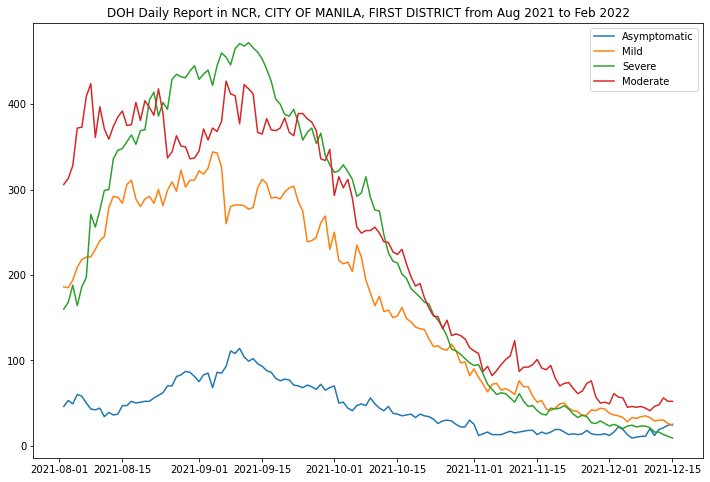

In [29]:
plt.figure(figsize=(12,8))
plt.plot(manila_date.conf_asym)
plt.plot(manila_date.conf_mild)
plt.plot(manila_date.conf_severe)
plt.plot(manila_date.conf_mod)
plt.legend(['Asymptomatic', 'Mild', 'Severe', 'Moderate'])
plt.title('DOH Daily Report in NCR, CITY OF MANILA, FIRST DISTRICT from Aug 2021 to Feb 2022')
plt.show()

In [30]:
sodGdays4.mild.head()

0    25809
1    36411
2    43442
3    45750
4    47571
Name: mild, dtype: int64